In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns


In [2]:
data = pd.read_csv("./ImpDt.csv")


In [3]:
data.head()

,Areu_Student,Gender,Feeling_nervous,Control_worrying,Different_things,Restless,Irritable,Something_awful,Physical_problems,Trouble_concentrating,Feeling_bad,Loss_interest,Feeling_tiredness,Trouble_falling,Feeling_guilty,Suicidal_thoughts,Treatment
0,Yes,Male,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No,No,No,No,No
1,Yes,Male,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No,No,No,No,No,No
2,Yes,Female,Yes,Yes,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No
3,Yes,Male,Yes,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No
4,Yes,Male,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,NaN


In [4]:
data.tail()

,Areu_Student,Gender,Feeling_nervous,Control_worrying,Different_things,Restless,Irritable,Something_awful,Physical_problems,Trouble_concentrating,Feeling_bad,Loss_interest,Feeling_tiredness,Trouble_falling,Feeling_guilty,Suicidal_thoughts,Treatment
52,No,Female,No,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No,Yes,No,No
53,Yes,Male,Yes,Yes,Yes,No,No,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes
54,Yes,Male,No,No,No,No,Yes,Yes,No,Yes,No,No,Yes,Yes,No,No,NaN
55,No,Female,No,No,No,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,No,No,No
56,Yes,Male,Yes,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes


In [5]:
data.shape

(57, 17)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Areu_Student           57 non-null     object
 1   Gender                 57 non-null     object
 2   Feeling_nervous        57 non-null     object
 3   Control_worrying       57 non-null     object
 4   Different_things       57 non-null     object
 5   Restless               57 non-null     object
 6   Irritable              57 non-null     object
 7   Something_awful        57 non-null     object
 8   Physical_problems      57 non-null     object
 9   Trouble_concentrating  57 non-null     object
 10  Feeling_bad            57 non-null     object
 11  Loss_interest          57 non-null     object
 12  Feeling_tiredness      57 non-null     object
 13  Trouble_falling        57 non-null     object
 14  Feeling_guilty         57 non-null     object
 15  Suicidal_thoughts      57

In [7]:
data.isnull().sum()

Areu_Student              0
Gender                    0
Feeling_nervous           0
Control_worrying          0
Different_things          0
Restless                  0
Irritable                 0
Something_awful           0
Physical_problems         0
Trouble_concentrating     0
Feeling_bad               0
Loss_interest             0
Feeling_tiredness         0
Trouble_falling           0
Feeling_guilty            0
Suicidal_thoughts         0
Treatment                19
dtype: int64

In [8]:
data['Gender'].replace([ 'Male', 'male', 'M', 'm', 'Male ',
                        'Cis Male', 'Man', 'cis male', 'Mail',
                        'Male-ish', 'Male (CIS)', 'Cis Man',
                        'msle', 'Malr', 'Mal', 'maile', 'Make', ], 'Male', inplace = True)

data['Gender'].replace([ 'Female ', 'female', 'F', 'f', 'Woman', 
                        'Female', 'femail', 'Cis Female', 'cis-female/femme', 
                        'Femake', 'Female (cis)', 'woman', ], 'Female', inplace = True)

data["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                        'fluid', 'queer', 'Androgyne', 'Trans-female', 
                        'male leaning androgynous', 'Agender', 'A little about you',
                        'Nah', 'All', 'ostensibly male, unsure what that really means',
                        'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?', 
                        'Guy (-ish) ^_^', 'Trans woman',], 'Non-Binary', inplace = True)

data['Gender'].value_counts()


Gender
Male      31
Female    26
Name: count, dtype: int64

In [9]:
data.drop(['Areu_Student','Gender'], axis = 1, inplace=True)

Text(0.5, 1.0, 'Feeling_nervous')

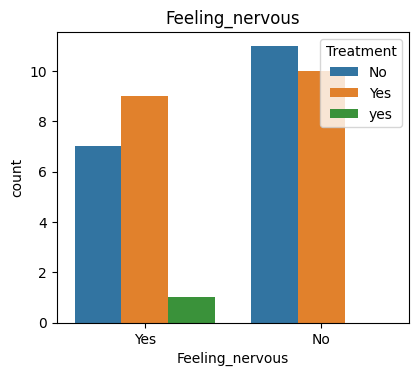

In [10]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,2)
sns.countplot(data=data, x="Feeling_nervous", hue="Treatment")
plt.title('Feeling_nervous')

In [11]:
data.describe(include='all')

,Feeling_nervous,Control_worrying,Different_things,Restless,Irritable,Something_awful,Physical_problems,Trouble_concentrating,Feeling_bad,Loss_interest,Feeling_tiredness,Trouble_falling,Feeling_guilty,Suicidal_thoughts,Treatment
count,57,57,57,57,57,57,57,57,57,57,57,57,57,57,38
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3
top,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes
freq,33,35,36,34,34,32,37,34,33,34,34,34,33,35,19


In [12]:
X = data.drop('Treatment', axis = 1)
y = data[ 'Treatment']

In [13]:
from sklearn. compose import ColumnTransformer
from sklearn. preprocessing import LabelEncoder, OrdinalEncoder 

In [14]:
X = data.drop('Treatment', axis= 1)
y = data['Treatment']

In [15]:
ct = ColumnTransformer([('oe', OrdinalEncoder(), [ 'Feeling_nervous', 'Control_worrying', 'Different_things',
                                                    'Restless', 'Irritable', 'Something_awful', 
                                                    'Physical_problems', 'Trouble_concentrating', 'Feeling_bad',
                                                    'Loss_interest', 'Feeling_tiredness',
                                                    'Trouble_falling', 'Feeling_guilty', 'Suicidal_thoughts'])],
                                                     remainder='passthrough')

In [16]:
x = ct.fit_transform(X)

In [17]:
le = LabelEncoder() 
y = le.fit_transform(y)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=49)

In [19]:
X_train. shape, X_test.shape, y_train. shape, y_test.shape 

((39, 14), (18, 14), (39,), (18,))

In [20]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, classification_report, auc 

In [21]:
model_dict = {}

model_dict['Decision Tree Classifier'] = DecisionTreeClassifier (random_state=30)


In [22]:
def model_test (X_train, X_test, y_train, y_test, model, model_name):
    model.fit(X_train,y_train) 
    y_pred = model.predict(X_test)
    accuracy = accuracy_score (y_test,y_pred)
    print('=============================={}==============================', format(model_name))
    print('Score is: {}'.format(accuracy))
    
    print()


In [23]:
for model_name, model in model_dict.items():
    model_test(X_train, X_test, y_train, y_test, model, model_name)

=============================={}============================== Decision Tree Classifier
Score is: 0.7777777777777778



In [24]:
Dcc = DecisionTreeClassifier (random_state=49)
Dcc.fit(X_train,y_train)
pred_Dcc = Dcc.predict(X_test)
print ('Accuracy of DicisionTree=', accuracy_score (y_test, pred_Dcc))

Accuracy of DicisionTree= 0.8333333333333334


In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
params_Dcc = {'max_depth': [int(x) for x in np.linspace(start=1, stop=50, num=15)],
              'min_samples_leaf': [1, 2, 4, 8, 16, 32],
              'max_features': [None, 'sqrt', 'log2']}

Dcc_random = RandomizedSearchCV(random_state=49, estimator=DecisionTreeClassifier(), param_distributions=params_Dcc, n_iter=50, cv=5, n_jobs=-1)

In [26]:
params_Dcc

{'max_depth': [1, 4, 8, 11, 15, 18, 22, 25, 29, 32, 36, 39, 43, 46, 50],
 'min_samples_leaf': [1, 2, 4, 8, 16, 32],
 'max_features': [None, 'sqrt', 'log2']}

In [27]:
Dcc_random.fit(X_train,y_train)

c:\Users\Viraj Patil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': [1, 4, 8, 11, 15, 18, 22,
                                                      25, 29, 32, 36, 39, 43,
                                                      46, 50],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4, 8, 16,
                                                             32]},
                   random_state=49)

In [28]:
Dcc_random.best_params_

{'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 22}

In [29]:
Dcc_tuned = DecisionTreeClassifier(random_state=49)
Dcc_tuned.fit(X_train,y_train)
pred_Dcc_tuned = Dcc_tuned.predict(X_test)
print ('Accuracy of DicisionTree(tuned)=', accuracy_score (y_test, pred_Dcc_tuned))


Accuracy of DicisionTree(tuned)= 0.8333333333333334


In [30]:
print(classification_report (y_test, pred_Dcc))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.83      0.83      0.83         6
           3       0.86      1.00      0.92         6

    accuracy                           0.83        18
   macro avg       0.83      0.83      0.83        18
weighted avg       0.83      0.83      0.83        18



In [31]:
print(classification_report (y_test, pred_Dcc_tuned))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.83      0.83      0.83         6
           3       0.86      1.00      0.92         6

    accuracy                           0.83        18
   macro avg       0.83      0.83      0.83        18
weighted avg       0.83      0.83      0.83        18



In [32]:
import pickle
pickle.dump(Dcc_tuned, open('./model.pkl', 'wb'))
pickle.dump(ct, open('./ct.pkl', 'wb'))
pickle.dump(le, open('./le.pkl', 'wb'))
model=pickle.load(open('./model.pkl','rb'))